<a href="https://colab.research.google.com/github/Dracomp89/Eduardo-Phillips---202115611/blob/main/Parcial_1/Parcial1_Eduardo_Phillips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Raíces Laguerre

In [30]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd


x = sp.Symbol('x')

def laguerre_polynomial(n):

      return sp.exp(x) * sp.diff(x**n * sp.exp(-x), x, n) / sp.factorial(n)

for n in range(1, 6):

    Ln = laguerre_polynomial(n)

    Ln_simplified = sp.simplify(Ln)

     # Convertir el polinomio a una expresión en función de x
    polynomial = sp.Poly(Ln_simplified, x)

    # Encontrar las raíces numéricas (reales y complejas)
    numerical_roots = polynomial.nroots()

    # Filtrar las raíces reales
    real_roots = [r.evalf() for r in numerical_roots if r.is_real]

    print(f"Raíces reales del polinomio de Laguerre L_{n}(x): {real_roots}")

Raíces reales del polinomio de Laguerre L_1(x): [1.00000000000000]
Raíces reales del polinomio de Laguerre L_2(x): [0.585786437626905, 3.41421356237309]
Raíces reales del polinomio de Laguerre L_3(x): [0.415774556783479, 2.29428036027904, 6.28994508293748]
Raíces reales del polinomio de Laguerre L_4(x): [0.322547689619392, 1.74576110115835, 4.53662029692113, 9.39507091230113]
Raíces reales del polinomio de Laguerre L_5(x): [0.263560319718141, 1.41340305910652, 3.59642577104072, 7.08581000585884, 12.6408008442758]


# Ejercicio 7 Interpolación

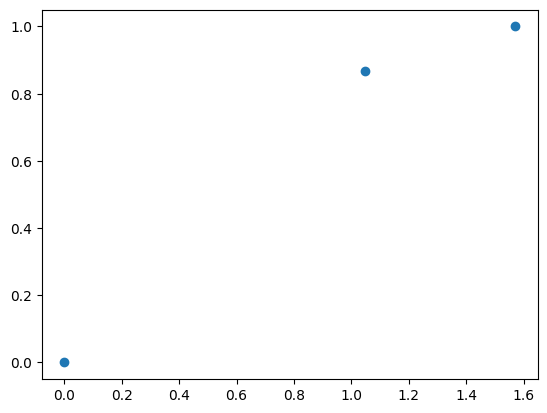

In [21]:
X=np.array([0,np.pi*(1/3),np.pi*(0.5)])
Y=np.array(np.sin(X))
plt.scatter(X,Y)
plt.show()

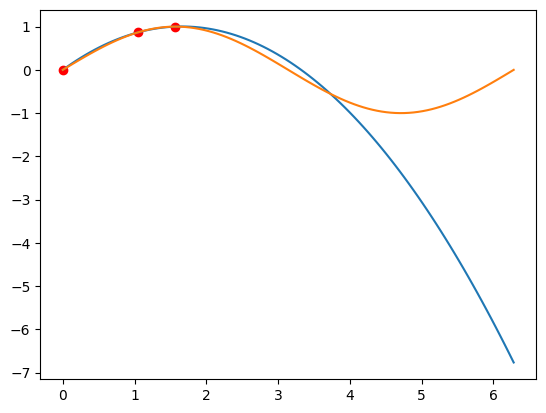

In [22]:


def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L


def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly


x1=np.linspace(0,2*np.pi,100)
Y2=Interpolate(x1,X,Y)
plt.plot(x1,Y2)
plt.plot(x1,np.sin(x1))
plt.scatter(X,Y, color="red")
plt.show()

In [23]:
x2=sym.Symbol("x")
Error=abs(Interpolate(x2,X,Y).subs(x2,np.pi/8)-np.sin(np.pi/8))
Error

0.0355255020780303

In [26]:
def error_teorico(f, X , xi):
  n=len(X)
  x=sym.Symbol("x")
  dfn=sym.diff(f,x,n)
  x0=X[0]
  x1=X[1]
  x2=X[2]
  l=sym.lambdify(x,dfn)
  # Calcular el término del error
  error = (l(xi) / np.math.factorial(3)) * (x - x0) * (x - x1) * (x - x2)
  return abs(error)

f=sym.sin(x)

xi = np.pi / 8

print(error_teorico(f, X , xi).subs(x,xi))

0.0466244537830583


<ipython-input-26-4b2f5a3bfacf>:10: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  error = (l(xi) / np.math.factorial(3)) * (x - x0) * (x - x1) * (x - x2)



ya que el error teórico en la interpolación representa una estimación del peor error posible dentro del intervalo, entonces tiene sentido que el error teorico sea menor al real, pues no es el peor error posible

# Camino Óptico

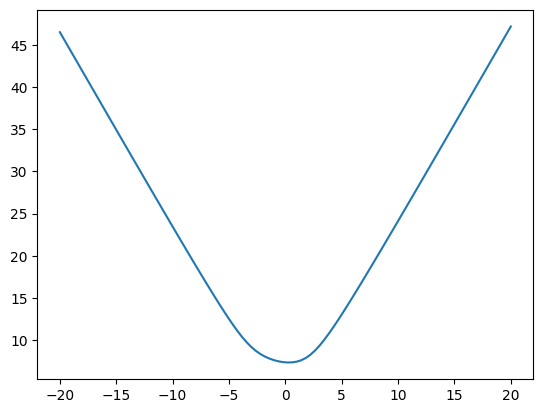

In [35]:
x=np.linspace(-20,20,100)

def camino_optico(x):
  n0=1
  n1=1.33
  ct=n0*np.sqrt(((x-T[0])**2)+T[1]**2)+n1*np.sqrt(((x-R[0])**2)+R[1]**2)
  return ct

T=np.array([-3,2])
R=np.array([2,-2])
ct=camino_optico(x)
plt.plot(x,ct)
plt.show()

In [36]:
def primera_derivada_central(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def segunda_derivada_central(f, x, h=1e-5):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

def newton_raphson(f, x0, tol=1e-9, max_iter=1000):
    x = x0
    for i in range(max_iter):
        f_prime = primera_derivada_central(f, x)
        f_double_prime = segunda_derivada_central(f, x)
        if abs(f_prime) < tol:
            return x, f(x)
        x_next = x - f_prime / f_double_prime

        if abs(x_next - x) < tol:
            return x_next, f(x_next)

        x = x_next

    raise ValueError("No convergió en el número máximo de iteraciones")

x = 0
xmin, tmin = newton_raphson(camino_optico, x)

# Imprimir el resultado
print(f"El tiempo mínimo se encuentra en x = {xmin}, con un tiempo mínimo de ct(x) = {tmin}")


El tiempo mínimo se encuentra en x = 0.31690575714302655, con un tiempo mínimo de ct(x) = 7.349795676886238


In [37]:
a0 = np.arctan2(T[1], xmin - T[0])
a1 = np.arcsin(n0 * np.sin(alpha_0) / n1)
a1d = np.degrees(a1)
a0d = np.degrees(a0)
print(a1d)
print(a0d)

NameError: name 'n0' is not defined

In [38]:
print(n0/n1)
print(np.sin(a1)/np.sin(a0))

NameError: name 'n0' is not defined